In [ ]:
import numpy as np
import seaborn as sns
import  matplotlib.pyplot as plt
import pandas as pd
from sklearn.preprocessing import LabelEncoder
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

In [ ]:
from google.colab import files
upload = files.upload()

Saving irisNew.csv to irisNew (4).csv


In [ ]:
df= pd.read_csv('irisNew.csv')

In [ ]:
df.head()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa


In [ ]:
df.isnull().sum()

,0
Id,0
SepalLengthCm,0
SepalWidthCm,0
PetalLengthCm,0
PetalWidthCm,0
Species,0


In [ ]:
df.duplicated().sum()

np.int64(0)

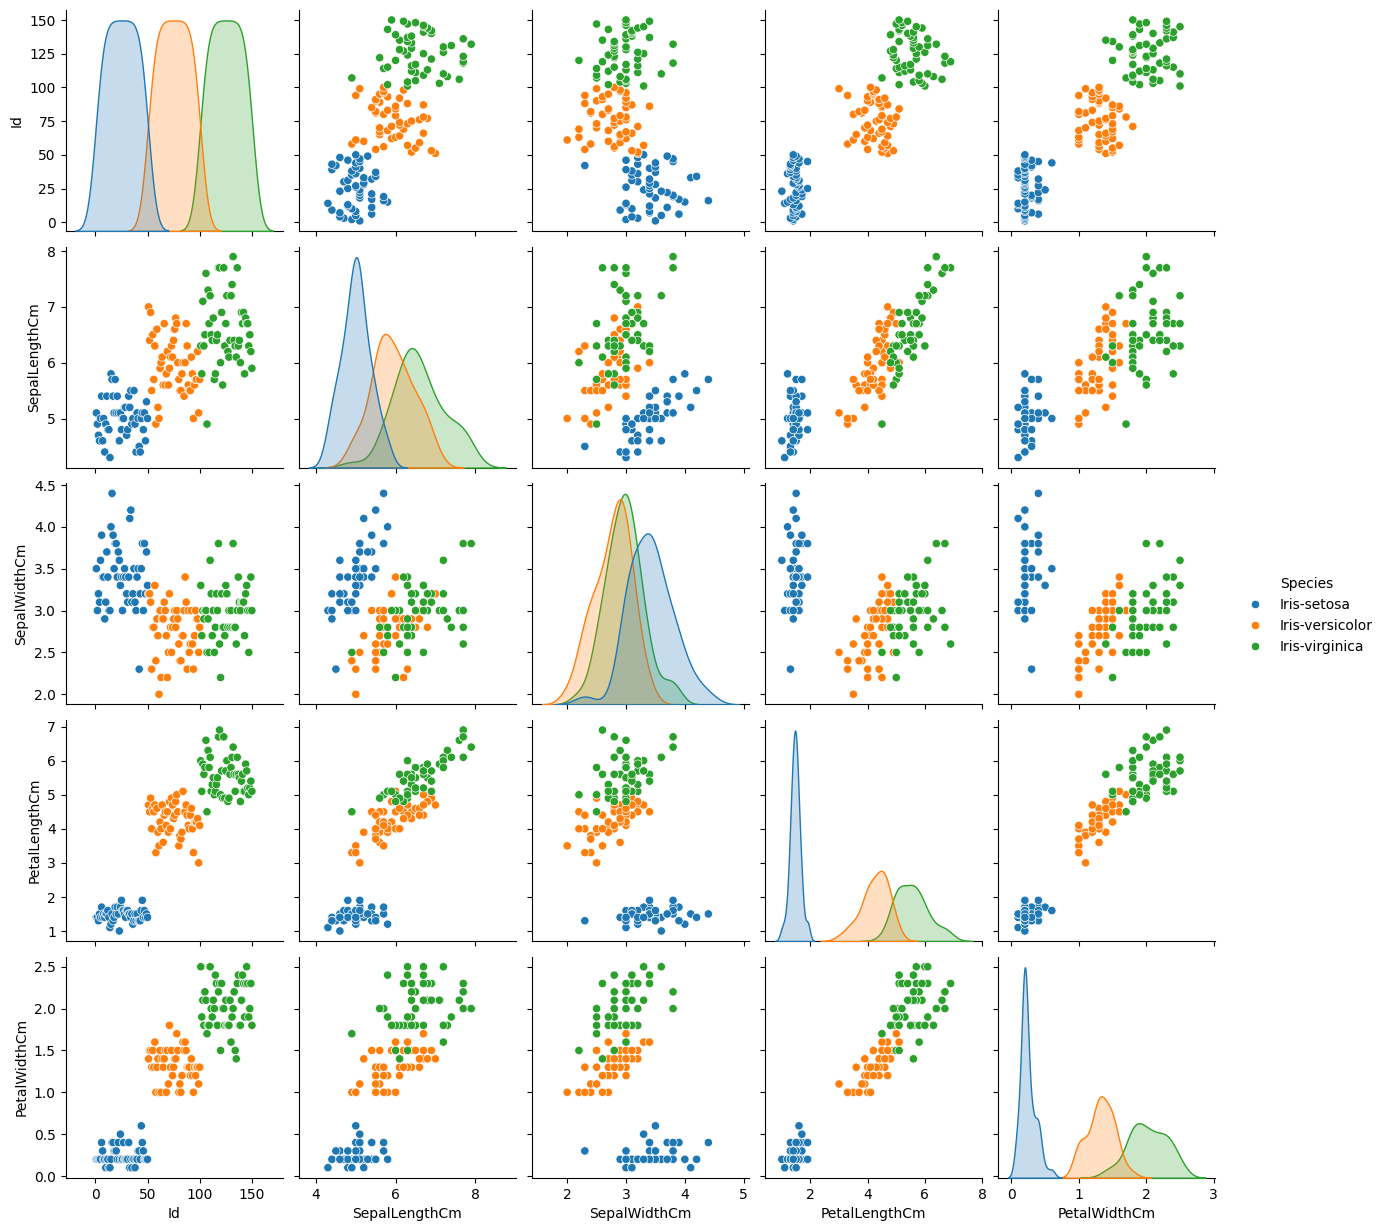

In [ ]:
sns.pairplot(df,hue='Species')

In [ ]:
df.shape

(150, 6)

In [ ]:
df.describe()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
count,150.000000,150.000000,150.000000,150.000000,150.000000
mean,75.500000,5.843333,3.054000,3.758667,1.198667
std,43.445368,0.828066,0.433594,1.764420,0.763161
min,1.000000,4.300000,2.000000,1.000000,0.100000
25%,38.250000,5.100000,2.800000,1.600000,0.300000
50%,75.500000,5.800000,3.000000,4.350000,1.300000
75%,112.750000,6.400000,3.300000,5.100000,1.800000
max,150.000000,7.900000,4.400000,6.900000,2.500000


<Axes: xlabel='SepalLengthCm', ylabel='SepalWidthCm'>

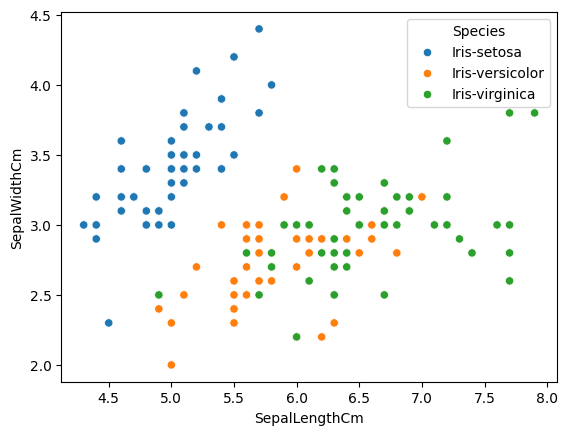

In [ ]:
sns.scatterplot(x='SepalLengthCm',y='SepalWidthCm',hue='Species',data=df)

<Axes: xlabel='Species', ylabel='PetalLengthCm'>

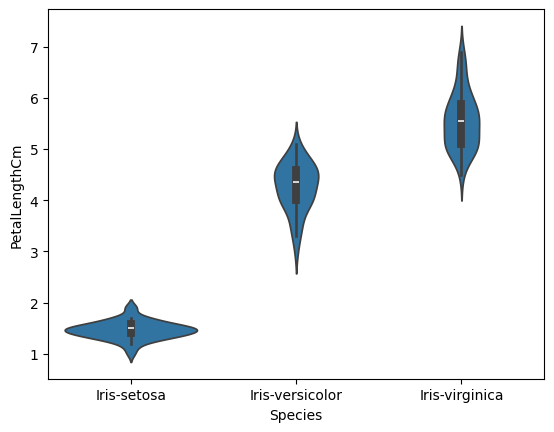

In [ ]:
sns.violinplot(x='Species',y='PetalLengthCm',data=df)

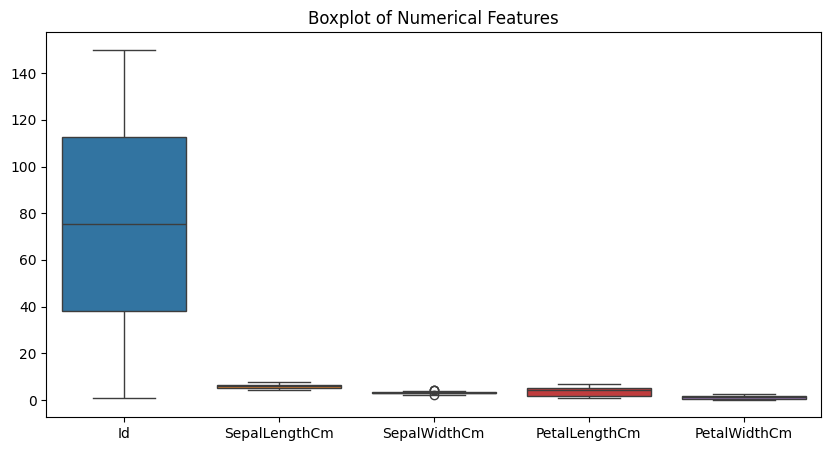

In [ ]:
plt.figure(figsize=(10,5))
sns.boxplot(data=df.drop(columns=['Species']))
plt.title('Boxplot of Numerical Features')
plt.show()

In [ ]:
le=LabelEncoder()

df['Species_Encoded'] = le.fit_transform(df['Species'])
df.head()


,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species,Species_Encoded
0,1,5.1,3.5,1.4,0.2,Iris-setosa,0
1,2,4.9,3.0,1.4,0.2,Iris-setosa,0
2,3,4.7,3.2,1.3,0.2,Iris-setosa,0
3,4,4.6,3.1,1.5,0.2,Iris-setosa,0
4,5,5.0,3.6,1.4,0.2,Iris-setosa,0


In [ ]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
num_cols = ['SepalLengthCm', 'SepalWidthCm', 'PetalLengthCm', 'PetalWidthCm']
df[num_cols] = scaler.fit_transform(df[num_cols])
df.head()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species,Species_Encoded
0,1,0.222222,0.625000,0.067797,0.041667,Iris-setosa,0
1,2,0.166667,0.416667,0.067797,0.041667,Iris-setosa,0
2,3,0.111111,0.500000,0.050847,0.041667,Iris-setosa,0
3,4,0.083333,0.458333,0.084746,0.041667,Iris-setosa,0
4,5,0.194444,0.666667,0.067797,0.041667,Iris-setosa,0


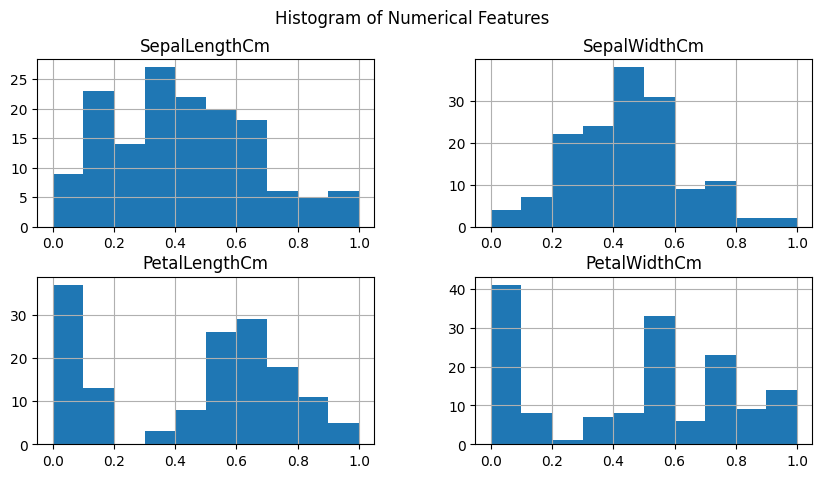

In [ ]:
df[num_cols].hist(figsize=(10,5))
plt.suptitle('Histogram of Numerical Features')
plt.show()

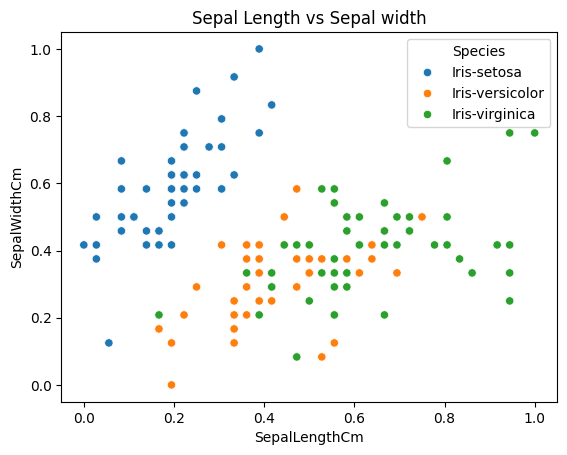

In [ ]:
sns.scatterplot(x=df['SepalLengthCm'],y=df['SepalWidthCm'],hue=df['Species'])
plt.title("Sepal Length vs Sepal width")
plt.show()

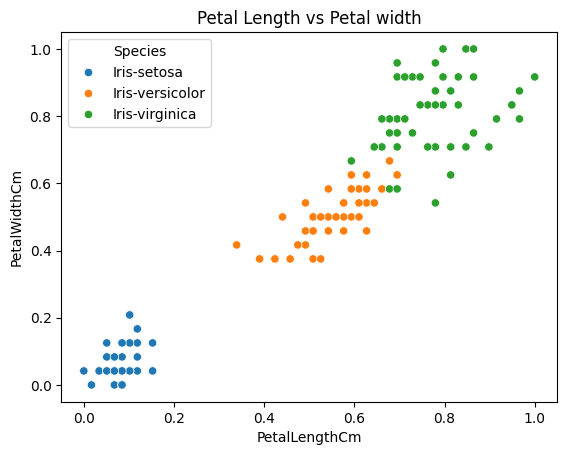

In [ ]:
sns.scatterplot(x=df['PetalLengthCm'],y=df['PetalWidthCm'],hue=df['Species'])
plt.title("Petal Length vs Petal width")
plt.show()

In [ ]:
filtered_df = df[df['PetalWidthCm']<4.2]
filtered_df.head()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species,Species_Encoded
0,1,0.222222,0.625000,0.067797,0.041667,Iris-setosa,0
1,2,0.166667,0.416667,0.067797,0.041667,Iris-setosa,0
2,3,0.111111,0.500000,0.050847,0.041667,Iris-setosa,0
3,4,0.083333,0.458333,0.084746,0.041667,Iris-setosa,0
4,5,0.194444,0.666667,0.067797,0.041667,Iris-setosa,0


In [ ]:
setosa_df = df[df['Species'] == 'Iris-setosa']
setosa_df.head()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species,Species_Encoded
0,1,0.222222,0.625000,0.067797,0.041667,Iris-setosa,0
1,2,0.166667,0.416667,0.067797,0.041667,Iris-setosa,0
2,3,0.111111,0.500000,0.050847,0.041667,Iris-setosa,0
3,4,0.083333,0.458333,0.084746,0.041667,Iris-setosa,0
4,5,0.194444,0.666667,0.067797,0.041667,Iris-setosa,0


In [ ]:
grouped_df = df.groupby('Species').mean()
grouped_df.head()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species_Encoded
Species,,,,,,
Iris-setosa,25.5,0.196111,0.590833,0.078644,0.060000,0.0
Iris-versicolor,75.5,0.454444,0.320833,0.552542,0.510833,1.0
Iris-virginica,125.5,0.635556,0.405833,0.771525,0.802500,2.0


In [ ]:
pivot_table = pd.pivot_table(df, values=['PetalLengthCm','PetalWidthCm'], index='Species', aggfunc='mean')
pivot_table.head()

,PetalLengthCm,PetalWidthCm
Species,,
Iris-setosa,0.078644,0.060000
Iris-versicolor,0.552542,0.510833
Iris-virginica,0.771525,0.802500


In [ ]:
melted_df = pd.melt(df, id_vars=['Species'], value_vars=['PetalLengthCm','PetalWidthCm','SepalLengthCm', 'SepalWidthCm'],
                    var_name='Features',value_name='Value')
melted_df.head()

,Species,Features,Value
0,Iris-setosa,PetalLengthCm,0.067797
1,Iris-setosa,PetalLengthCm,0.067797
2,Iris-setosa,PetalLengthCm,0.050847
3,Iris-setosa,PetalLengthCm,0.084746
4,Iris-setosa,PetalLengthCm,0.067797


In [ ]:
df1 = df[['SepalLengthCm','Species']]
df2 = df[['SepalWidthCm','Species']]

merged_df = pd.merge(df1,df2,on='Species')
merged_df.head()

,SepalLengthCm,Species,SepalWidthCm
0,0.222222,Iris-setosa,0.625000
1,0.222222,Iris-setosa,0.416667
2,0.222222,Iris-setosa,0.500000
3,0.222222,Iris-setosa,0.458333
4,0.222222,Iris-setosa,0.666667


In [ ]:
X = df.drop(['Id','Species'], axis=1)
y = df['Species']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state = 42)


In [ ]:
model = LogisticRegression(max_iter=200)
model.fit(X_train, y_train)

LogisticRegression(max_iter=200)

In [ ]:
y_pred = model.predict(X_test)

In [ ]:
acc = accuracy_score(y_test, y_pred)
print("Model Accuracy:", acc)

Model Accuracy: 1.0
